# SecurePark Solutions: Plate Number Detection

In [1]:
# Importing OpenCV library

import cv2

import warnings
warnings.filterwarnings("ignore")

In [2]:
image = cv2.imread('car1.jpg')

In [3]:
image.ndim

3

In [4]:
image.shape

(742, 1200, 3)

In [5]:
type(image)

numpy.ndarray

In [6]:
# Converting default image in BRG to GRAY
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [7]:
gray.shape

(742, 1200)

## Foundation for detection: Pre-trained model - 1

In [8]:
# Classifier + haar cascade feature descriptor - Option 1

In [9]:
# Initialize the model
plate_classifiers = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")

In [10]:
# Plate number detection

detected_plate_numbers = plate_classifiers.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=6)

In [11]:
# Tells us the number of detections seen in array. (x,y,w,h))

detected_plate_numbers

array([[803, 295,  68,  23]])

In [12]:
for (x,y,w,h) in detected_plate_numbers:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 2)

In [13]:
cv2.imshow('Plate number detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
import matplotlib.pyplot as plt

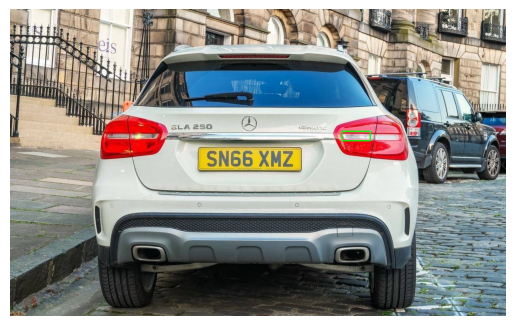

In [15]:
# You can show thesame image using matplotlip within jupiter notebook.- Option 2
plt_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB to display.
detected_plate_numbers = plate_classifiers.detectMultiScale(plt_image, scaleFactor=1.2, minNeighbors=6)
plt.imshow(plt_image)
plt.axis("off")
plt.show()

## Foundation for detection: Pre-trained model - 2

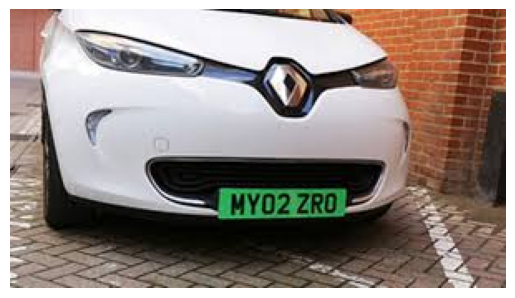

In [16]:
 
image2 = cv2.imread('car4.jpg')
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
detected_plate_numbers2 = plate_classifiers.detectMultiScale(gray2, scaleFactor=1.2, minNeighbors=6)
for (x,y,w,h) in detected_plate_numbers2:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 2), 2)

plt_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB) # convert to RGB to display.
detected_plate_numbers2 = plate_classifiers.detectMultiScale(plt_image2, scaleFactor=1.2, minNeighbors=6)
plt.imshow(plt_image2)
plt.axis("off")
plt.show()

#### Narration

Observing and testing the pre-train model to see how the model detect the plate number (Pre-trained model 1 & 2)

# Load the Haar cascade classifier for Russian plate numbers
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')


image = cv2.imread('car4.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect plate numbers using the classifier
plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw bounding boxes around detected plates 
for (x, y, w, h) in plates:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow('Plate Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plate Number Detection and Extraction

### Install required library by following the steps below:

Step 1:
!pip install easyocr

Step 2:
!pip uninstall opencv-python-headless -y

Step 3:
!pip install opencv-python

In [17]:
!pip install easyocr

  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)


In [18]:
!pip uninstall opencv-python-headless -y

Found existing installation: opencv-python-headless 4.11.0.86
Uninstalling opencv-python-headless-4.11.0.86:
  Successfully uninstalled opencv-python-headless-4.11.0.86


In [19]:
!pip install opencv-python

In [20]:
import easyocr

In [21]:
# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])
# reader = easyocr.Reader(['en'], gpu=False)  # Set gpu=False if you don't have GPU

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [22]:
# Perform OCR on the image
reader.readtext(gray, detail=0)[-1]

'SN66 XMZ'

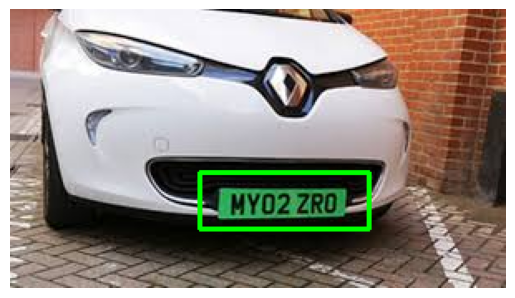

Detected Plate Number: M02Zr0


In [23]:
image = cv2.imread('car4.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the model
plate_classifiers = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

# plate number detection
detected_plate_numbers = plate_classifiers.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw bounding box
for (x, y, w, h) in detected_plate_numbers:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Extracting the plate number
# Perform OCR on the image
results = reader.readtext(gray, detail=0)[-1]

plt_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB to display.
plt.imshow(plt_image)
plt.axis("off")
plt.show()

print(f"Detected Plate Number: {results}")

In [114]:
# Downloading recognition model, please wait. This may take several minutes depending upon your network connection.

# QR Code Generation and Display

### Install required library using the command below:

!pip install qrcode

In [115]:
import qrcode
import numpy as np

In [116]:
# Steganography is the practice of hiding secrete infor within a non-secrete medium, such as text, image,or audio, to avoid detection. 

In [117]:
# Generate a QR code - Eg 1 (The version, box_size, border can be increased and play around with it)
qr = qrcode.QRCode(version=1,
                   box_size=10, 
                   border=4)

In [118]:
qr.add_data("this is risky don't click me")

In [119]:
qr.make(fit=True)

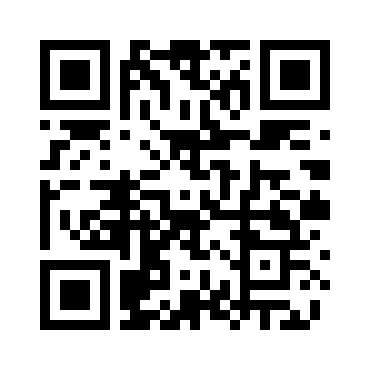

In [120]:
qr.make_image(fill_color="black", back_color="white")

In [131]:
# Generate a QR code - Eg 2
qr = qrcode.QRCode(version=1,
                   box_size=10, 
                   border=4)
qr.add_data(results)

qr.make(fit=True)

In [132]:
# Create an image from the QR Code instance
qr_img = qr.make_image(fill_color="black", back_color="white")
# qr_img = qr.make_image(fill_color="blue", back_color="yellow")


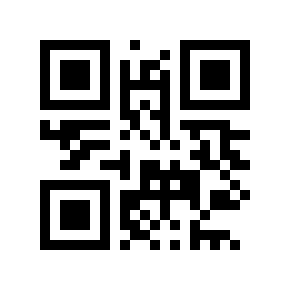

In [133]:
qr_img

In [134]:
type(qr_img)

qrcode.image.pil.PilImage

In [135]:
import numpy as np

In [136]:
# Convert the image to a format that OpenCV can display
qr_img_np = np.array(qr_img.convert('RGB'))

In [137]:
# Convert the RGB image to BGR format for OpenCV
qr_img_np = cv2.cvtColor(qr_img_np, cv2.COLOR_RGB2BGR)


In [138]:
# Save the QR Code 
cv2.imwrite(f'{results}.png', qr_img_np)

True

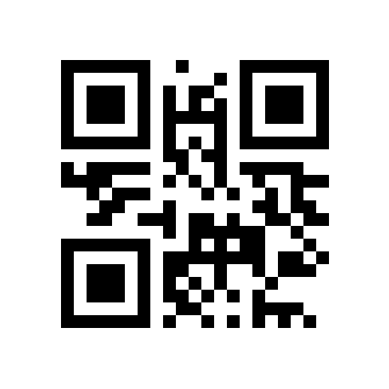

Detected Plate Number: M02Zr0


In [139]:
# Display the QR Code 
plt.imshow(qr_img_np)
plt.axis("off")
plt.show()

print(f"Detected Plate Number: {results}")

# QR Code Decoding and Verification

In [140]:
# Initialize QR code detector
qr_detector = cv2.QRCodeDetector()
test_image = cv2.imread(f'{results}.png')

In [141]:
# Detect and decode QR code
msg, bbox, _ = qr_detector.detectAndDecode(test_image)
print(msg)

M02Zr0


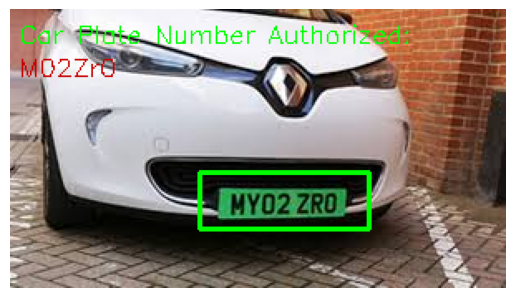

In [153]:
if msg == results:
    cv2.putText(image, f"Car Plate Number Authorized: ", (5, 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    cv2.putText(image, msg, (5, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 1)
    
plt_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)
plt.axis("off")
plt.show()